In [26]:
if ( ! exists("options_org")) {
    options_org <- options()
}

## The PDF
Plot the PDF of the binomial distribution the random variable $X \sim B(10,5)$.

[1] 0.0009765625 0.0097656250 0.0439453125 0.1171875000 0.2050781250
 [6] 0.2460937500 0.2050781250 0.1171875000 0.0439453125 0.0097656250
[11] 0.0009765625

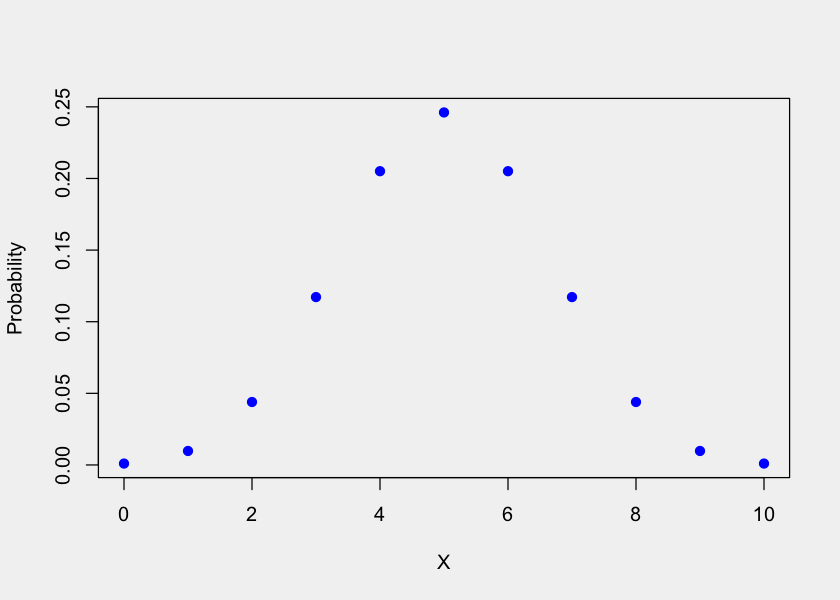

In [394]:
options(repr.plot.width=7, repr.plot.height=5)
n = 10
p = .5

x = seq(0, n)
px = dbinom(x, n, p)
px
par(bg = 'gray95') 
plot(x, px, pch=19, col='blue', xlab='X', ylab='Probability')

## The Distribution
Sample data for a random variable $X \sim B(n, p)$ and:
- Approximate $P(X \ge k)$ and $P(X < n - k)$ for $0 \le k \le n$.
- Plot the histogram of the distribution of the sampling data.

In [529]:
n=10
n_samples = 20
n_repeats = 100
sampling_proportion_u = sampling_proportion_l = rep(NA, n_repeats)
k = 10 # n*p = .5

cat('(n_samples, n, p) -> (', n_samples, ',', n, ',', p, ')\n\n')

for (i in 1:n_repeats) {
    rx = sort(rbinom(n_samples, n, p))
    sampling_proportion_u[i] = sum(rx >= k) / n_samples
    sampling_proportion_l[i] = sum(rx < n - k) / n_samples
    
    if (i <= min(10, n_repeats/2)) {
        cat(rx, ' -> u:', sampling_proportion_u[i], ' (l:' , sampling_proportion_l[i] , ') -> ', sampling_proportion_u[i] * n_samples, '\n')
    }
}
cat('...\n')

cat('P(X >= ', k, '):', mean(sampling_proportion_u), '\n')
cat('P(X < ', k, '):', mean(sampling_proportion_l), '\n')

(n_samples, n, p) -> ( 20 , 10 , 0.5 )

2 3 4 4 4 5 5 5 5 5 5 5 6 6 6 6 6 6 7 9  -> u: 0  (l: 0 ) ->  0 
1 2 2 2 3 4 4 4 4 5 5 5 5 5 6 6 6 7 7 7  -> u: 0  (l: 0 ) ->  0 
3 3 4 4 4 4 4 4 5 5 6 6 6 6 6 7 7 7 9 10  -> u: 0.05  (l: 0 ) ->  1 
2 2 3 3 3 4 4 4 5 5 5 5 6 6 7 7 7 7 7 7  -> u: 0  (l: 0 ) ->  0 
3 3 4 4 4 5 5 5 5 5 6 6 6 6 6 7 7 7 8 8  -> u: 0  (l: 0 ) ->  0 
2 3 3 3 4 4 4 4 4 4 5 5 5 5 5 6 6 7 7 7  -> u: 0  (l: 0 ) ->  0 
2 3 3 3 3 4 4 4 4 4 5 5 5 5 6 6 6 6 6 7  -> u: 0  (l: 0 ) ->  0 
2 3 3 3 3 3 4 5 5 5 5 5 5 5 6 6 6 7 7 7  -> u: 0  (l: 0 ) ->  0 
3 3 3 3 4 5 5 5 5 5 5 6 6 6 6 6 6 7 7 8  -> u: 0  (l: 0 ) ->  0 
2 3 3 4 4 4 4 5 5 6 6 6 6 6 6 6 6 7 7 7  -> u: 0  (l: 0 ) ->  0 
...
P(X >=  10 ): 0.002 
P(X <  10 ): 0 


(n_samples, n, p) -> ( 2000 , 10 , 0.5 )



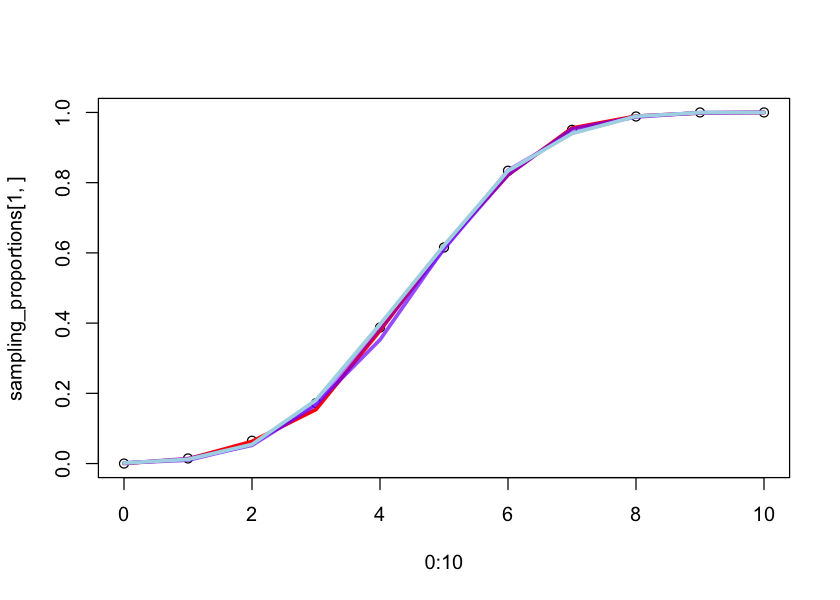

In [581]:
n=10
n_samples = 2000
n_repeats = 100

pc = rep(NA, n)
sampling_proportions = matrix( rep(NA, (n + 1) * n_repeats), ncol=(n+1))

cat('(n_samples, n, p) -> (', n_samples, ',', n, ',', p, ')\n\n')

for (k in 0:n) {
    for (i in 1:n_repeats) {
        rx = sort(rbinom(n_samples, n, p))
        sampling_proportions[, k+1][i] = sum(rx <= k) / n_samples
    }
}

plot(0:10, sampling_proportions[1, ])
points(0:10, sampling_proportions[2, ], col='red', type='l', lwd=3)
points(0:10, sampling_proportions[3, ], col=rgb(.5, .2, 1, .5), type='l', pch=16, lwd=3)
points(0:10, sampling_proportions[4, ], col=rgb(.5, .2, 1, .7), type='l', pch=16, lwd=3)
points(0:10, sampling_proportions[5, ], col='lightblue', type='l', pch=16, lwd=3)
# scatter()


In [555]:
# rowMeans(sampling_proportions)


In [560]:
i=min(10, n_repeats)
sampling_proportions[1:i,]

1e-03,0.0090,0.0620,0.1860,0.3745,0.6200,0.8400,0.9495,0.9920,0.9995,1
1e-03,0.0160,0.0530,0.1650,0.3805,0.6340,0.8115,0.9450,0.9890,0.9975,1
5e-04,0.0105,0.0465,0.1710,0.3800,0.5975,0.8145,0.9410,0.9865,1.0000,1
2e-03,0.0065,0.0500,0.1700,0.3730,0.6175,0.8300,0.9440,0.9895,0.9990,1
1e-03,0.0095,0.0570,0.1730,0.4060,0.6335,0.8220,0.9450,0.9895,0.9985,1
5e-04,0.0100,0.0480,0.1745,0.3725,0.6160,0.8220,0.9390,0.9895,0.9990,1
5e-04,0.0075,0.0595,0.1880,0.3680,0.6060,0.8210,0.9460,0.9835,0.9995,1
5e-04,0.0085,0.0535,0.1800,0.3780,0.6350,0.8250,0.9450,0.9905,1.0000,1
0e+00,0.0130,0.0590,0.1670,0.3700,0.6140,0.8285,0.9320,0.9870,0.9990,1
1e-03,0.0105,0.0540,0.1775,0.3740,0.6175,0.8235,0.9435,0.9890,0.9975,1
